# Data Assessment & Analytics for Water Right and Time Series Water Use
Notes:
- change os directory location
- be aware of the number of provdied native source data files
- beware of of what data is available

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\Minnesota\WaterAllocation_WaterUse


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/Minnesota/WaterAllocation_WaterUse"  # set this to where input files are located

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: -
dfin1 = pd.read_csv(InputFolderString + '/RawinputData/mpars_index_permits_installations_uses_WGS1984.zip')

# # Data Set 2: --
# dfin2 = pd.read_csv(InputFolderString + '/RawinputData/--.zip')

C:\Users\rjame\AppData\Local\Temp\ipykernel_6568\1942750323.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfin1 = pd.read_csv(InputFolderString + '/RawinputData/mpars_index_permits_installations_uses_WGS1984.zip')


In [5]:
# WaDE Processed Input Data
#################################################################

dfm = pd.read_csv(InputFolderString + "/ProcessedInputData/methods.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfv = pd.read_csv(InputFolderString + "/ProcessedInputData/variables.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfo = pd.read_csv(InputFolderString + "/ProcessedInputData/organizations.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfws = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources.csv").replace(np.nan, "")
dfwspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources_missing.csv").replace(np.nan, "")

dfs = pd.read_csv(InputFolderString + "/ProcessedInputData/sites.csv").replace(np.nan, "")
dfspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sites_missing.csv").replace(np.nan, "")

dfaa = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations.csv").replace(np.nan, "")
dfaapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations_missing.csv").replace(np.nan, "")

dfsa = pd.read_csv(InputFolderString + "/ProcessedInputData/sitespecificamounts.csv").replace(np.nan, "")
dfsapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sitespecificamounts_missing.csv").replace(np.nan, "")

C:\Users\rjame\AppData\Local\Temp\ipykernel_6568\2624352394.py:20: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfsapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sitespecificamounts_missing.csv").replace(np.nan, "")


# Water Source Info (watersources.csv)

In [6]:
print(len(dfws))
dfws.head(1)

14420


WaterSourceUUID Geometry GNISFeatureNameCV WaterQualityIndicatorCV  \
0  MNwr_WS1000001289                                              Fresh   

  WaterSourceName WaterSourceNativeID WaterSourceTypeCV  
0      WaDE Blank          1000001289       Groundwater

<Axes: >

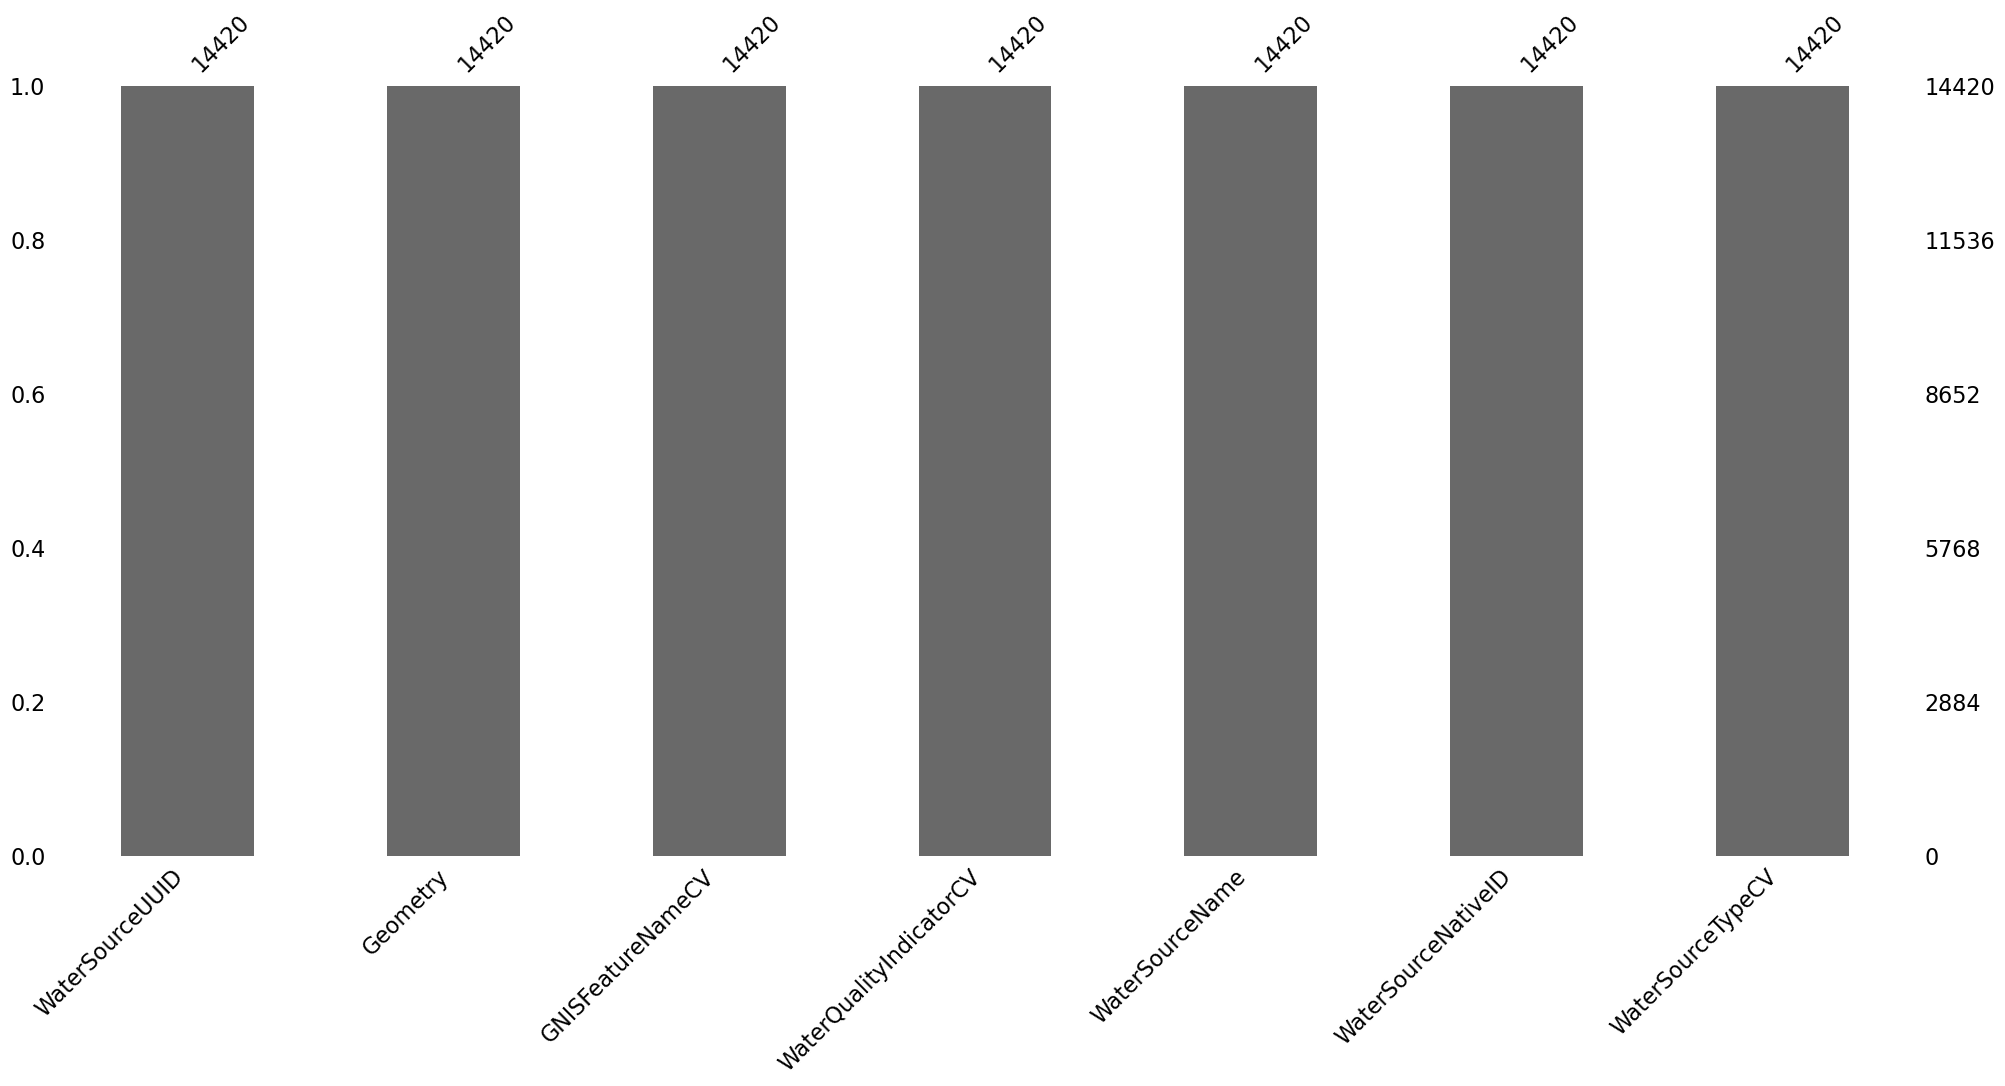

In [7]:
# Check what columns contain missing information.
msno.bar(dfws)

In [8]:
# Unique values for 'WaterSourceTypeCV'
for x in dfws['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Groundwater",
"Surface Water",
"WaDE Blank",


# Site Info (sites.csv)

In [9]:
print(len(dfs))
dfs.head(1)

16741


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  MNwr_SwadeId1000                           MNwr_WS686289   

  CoordinateAccuracy CoordinateMethodCV  County  EPSGCodeCV Geometry  \
0         WaDE Blank         WaDE Blank  Isanti        4326            

  GNISCodeCV HUC12 HUC8  Latitude  Longitude NHDNetworkStatusCV NHDProductCV  \
0                        45.59440  -93.17950                                   

  PODorPOUSite SiteName SiteNativeID SitePoint  SiteTypeCV StateCV USGSSiteID  
0          POD       10   wadeId1000            WaDE Blank      MN

<Axes: >

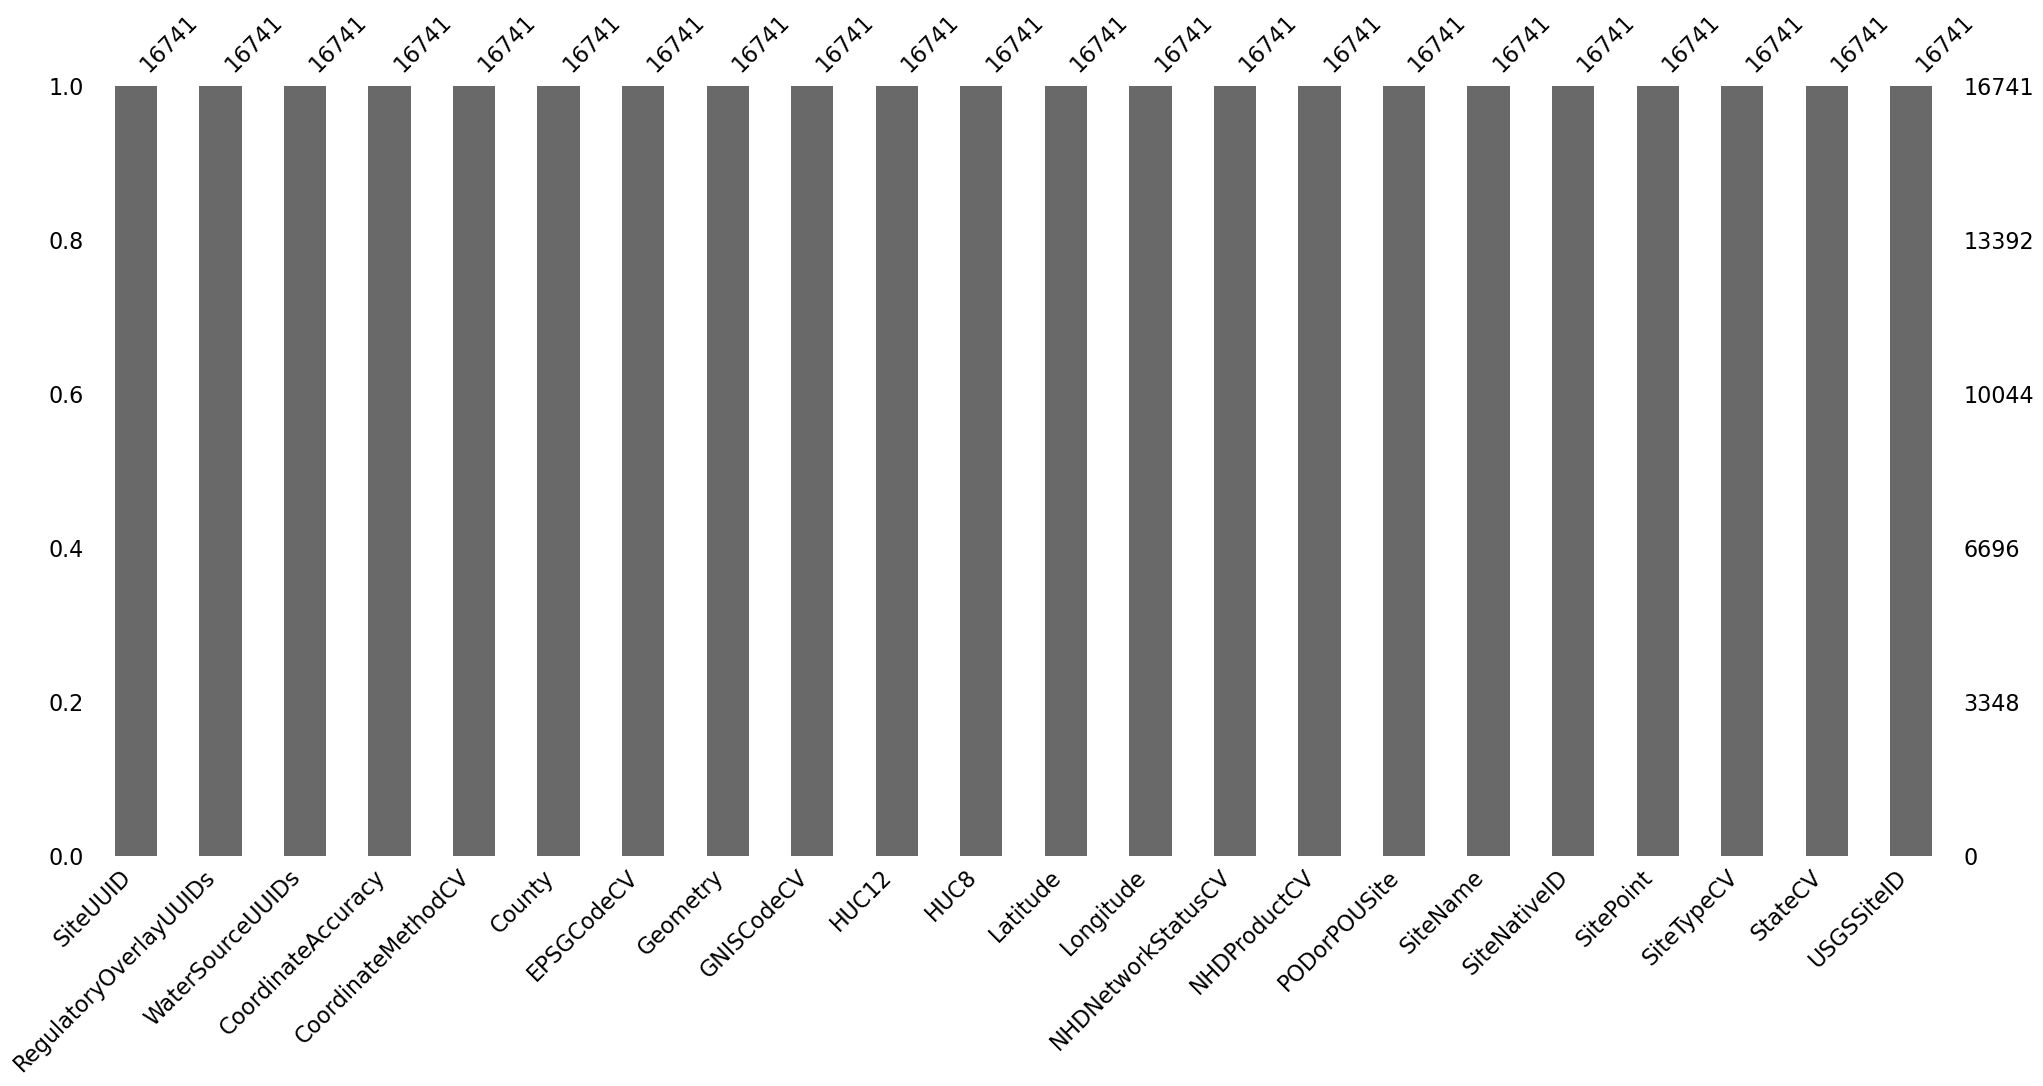

In [10]:
# Check what columns contain missing information.
msno.bar(dfs)

In [11]:
# Unique values for 'CoordinateMethodCV'
for x in dfs['CoordinateMethodCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Blank",


In [12]:
# Unique values for 'SiteTypeCV'
for x in dfs['SiteTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Blank",


# Allocation Amount Info (waterallocations.csv)

In [13]:
print(len(dfaa))
dfaa.head(1)

10335


AllocationUUID MethodUUID OrganizationUUID       SiteUUID  \
0  MNwr_WR19470012    MNwr_M1          MNwr_O1  MNwr_SwadeId2   

  VariableSpecificUUID AllocationApplicationDate  \
0              MNwr_V1                             

  AllocationAssociatedConsumptiveUseSiteIDs  \
0                                             

  AllocationAssociatedWithdrawalSiteIDs AllocationBasisCV  \
0                                              WaDE Blank   

  AllocationChangeApplicationIndicator AllocationCommunityWaterSupplySystem  \
0                                                                             

  AllocationCropDutyAmount AllocationExpirationDate  AllocationFlow_CFS  \
0                                                               0.00000   

  AllocationLegalStatusCV AllocationNativeID  \
0                  Active          1947-0012   

                         AllocationOwner AllocationPriorityDate  \
0  Cleveland Cliffs Northshore Mining Co                          

  AllocationSDWISIdentifierCV AllocationTimeframeEnd AllocationTimeframeStart  \
0                                                                               

    AllocationTypeCV  AllocationVolume_AF  BeneficialUseCategory  \
0  Individual Permit         153444.39250  Industrial Processing   

  CommunityWaterSupplySystem CropTypeCV CustomerTypeCV DataPublicationDate  \
0                                                               02/05/2024   

  DataPublicationDOI  ExemptOfVolumeFlowPriority GeneratedPowerCapacityMW  \
0                                              1                            

   IrrigatedAcreage IrrigationMethodCV LegacyAllocationIDs  \
0           0.00000                                          

  OwnerClassificationCV PopulationServed PowerType  \
0               Private                              

  PrimaryBeneficialUseCategory WaterAllocationNativeURL  
0        Commercial/Industrial

<Axes: >

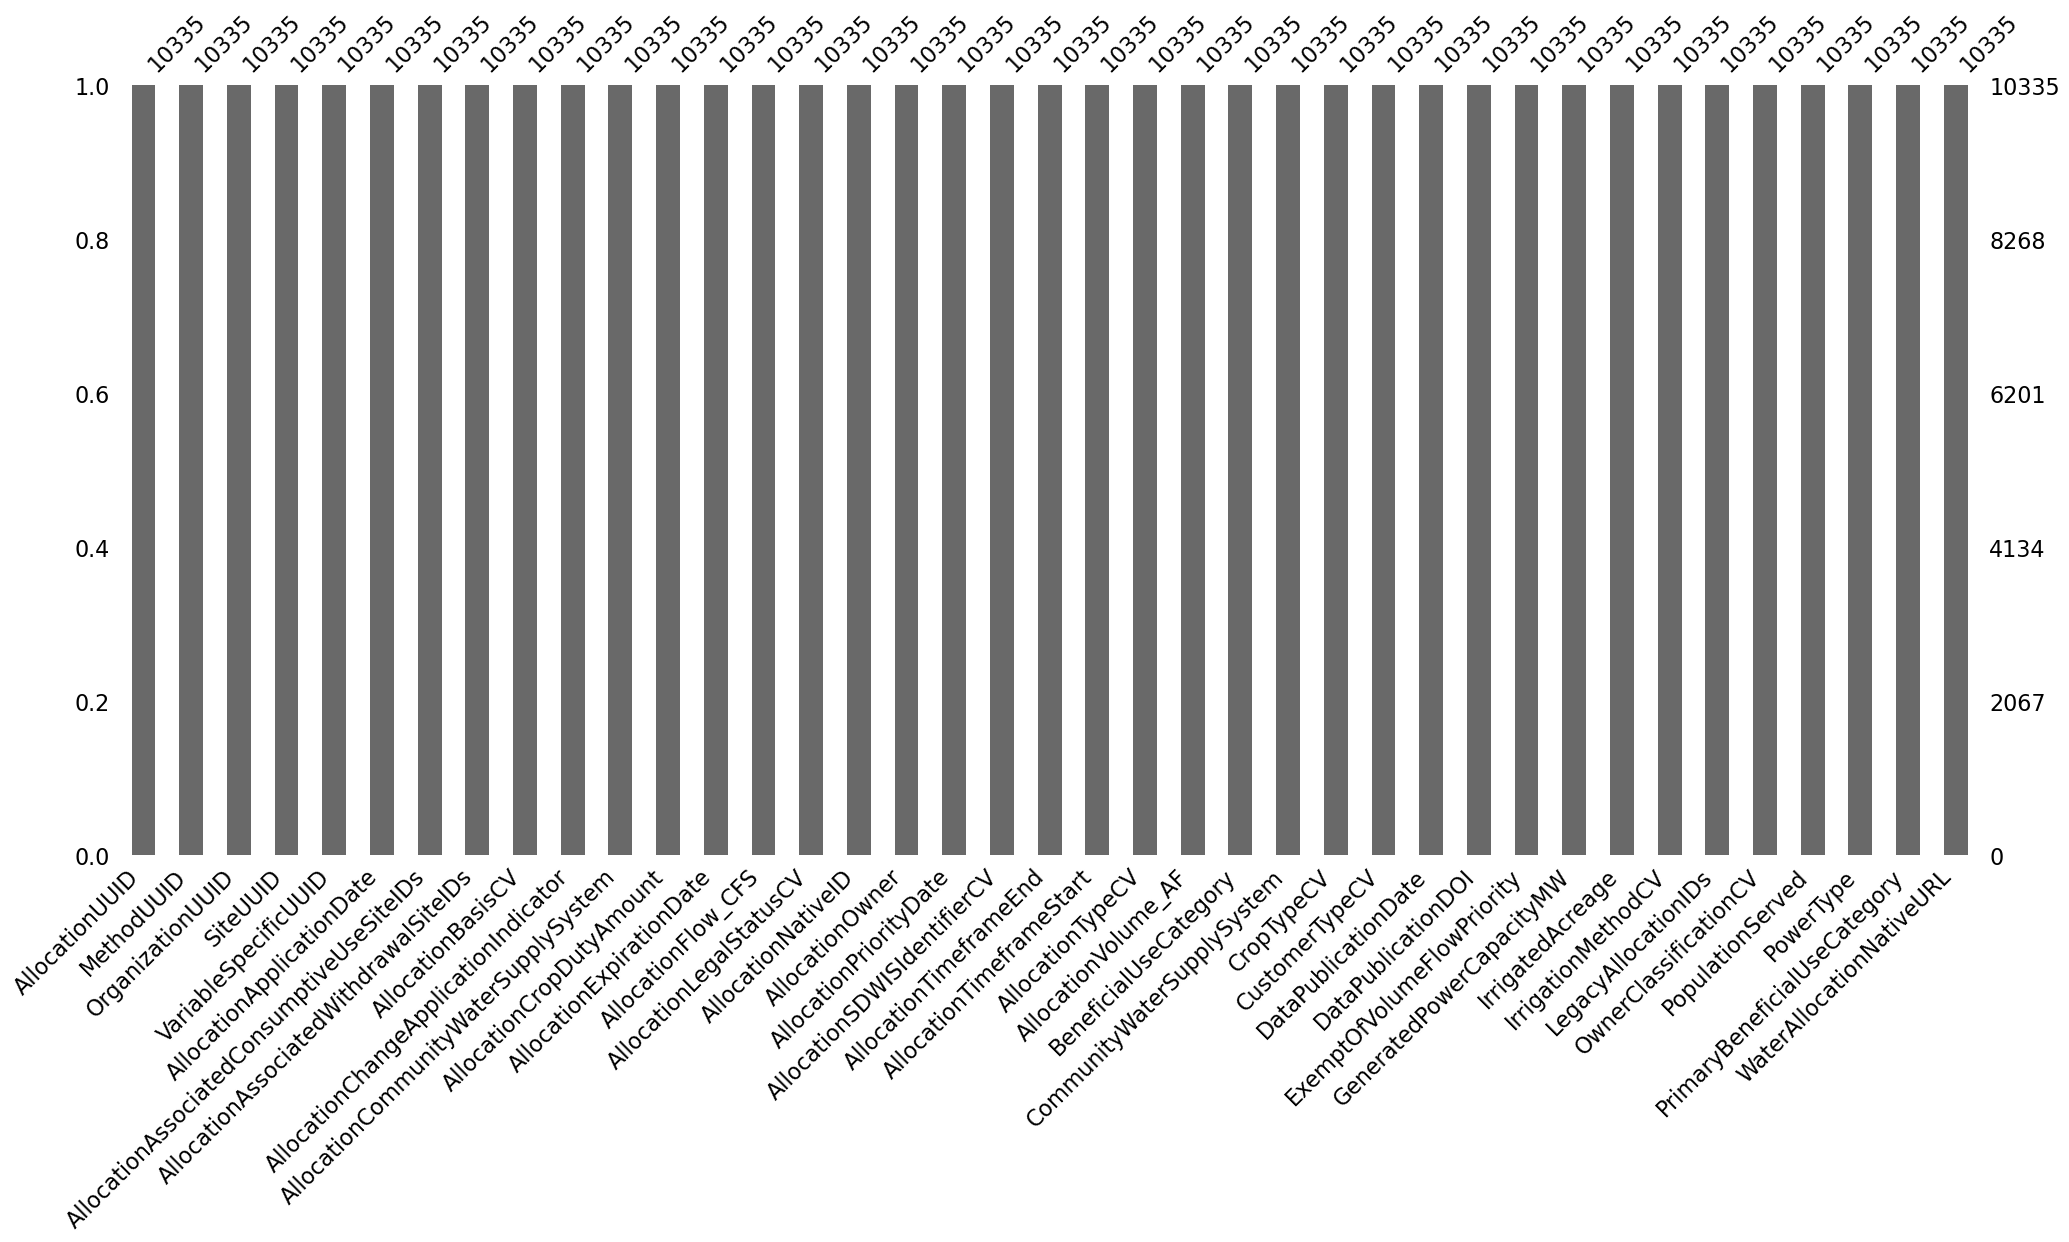

In [14]:
# Check what columns contain missing information.
msno.bar(dfaa)

In [15]:
# Unique values for 'AllocationBasisCV'
for x in dfaa['AllocationBasisCV'].sort_values().unique():
    print(f'"' + str(x) + '",')

"WaDE Blank",


In [16]:
# Unique values for 'AllocationTypeCV'
for x in dfaa['AllocationTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"General Permit Authorization",
"Individual Permit",


In [17]:
# Unique values for 'AllocationLegalStatusCV'
for x in dfaa['AllocationLegalStatusCV'].sort_values().unique():
    print(f'"' + x + '",')

"Active",


In [18]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfaa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Agricultural Irrigation',
 'Heating/Cooling',
 'Industrial Processing',
 'Non-Crop Irrigation',
 'Power Generation',
 'Special Categories',
 'Water Level Maintenance',
 'Water Supply']

In [19]:
# Unique values for 'OwnerClassificationCV'
for x in dfaa['OwnerClassificationCV'].sort_values().unique():
    print(f'"' + x + '",')

"Environmental Protection Agency (USEPA)",
"Federal Aviation Administration (USFAA)",
"Fish and Wildlife Service (USFWS)",
"Military",
"National Park Service (USNPS)",
"Private",
"United States of America",


# Site-Specific Amount Info (sitespecificamounts.csv)

In [20]:
print(len(dfsa))
dfsa.head(1)

272917


MethodUUID OrganizationUUID       SiteUUID VariableSpecificUUID  \
0    MNwr_M1          MNwr_O1  MNwr_SwadeId4             MNwr_V12   

  WaterSourceUUID     Amount AllocationCropDutyAmount  \
0   MNwr_WS222049 1877.02000                            

  AssociatedNativeAllocationIDs BeneficialUseCategory  \
0                                        Water Supply   

  CommunityWaterSupplySystem CropTypeCV CustomerTypeCV DataPublicationDate  \
0                                                               02/06/2024   

  DataPublicationDOI Geometry IrrigatedAcreage IrrigationMethodCV  \
0                                                                   

  PopulationServed PowerGeneratedGWh PowerType PrimaryUseCategory  \
0                                                   Public Supply   

   ReportYearCV SDWISIdentifier TimeframeEnd TimeframeStart  
0          1988                   1988-12-31     1988-01-01

<Axes: >

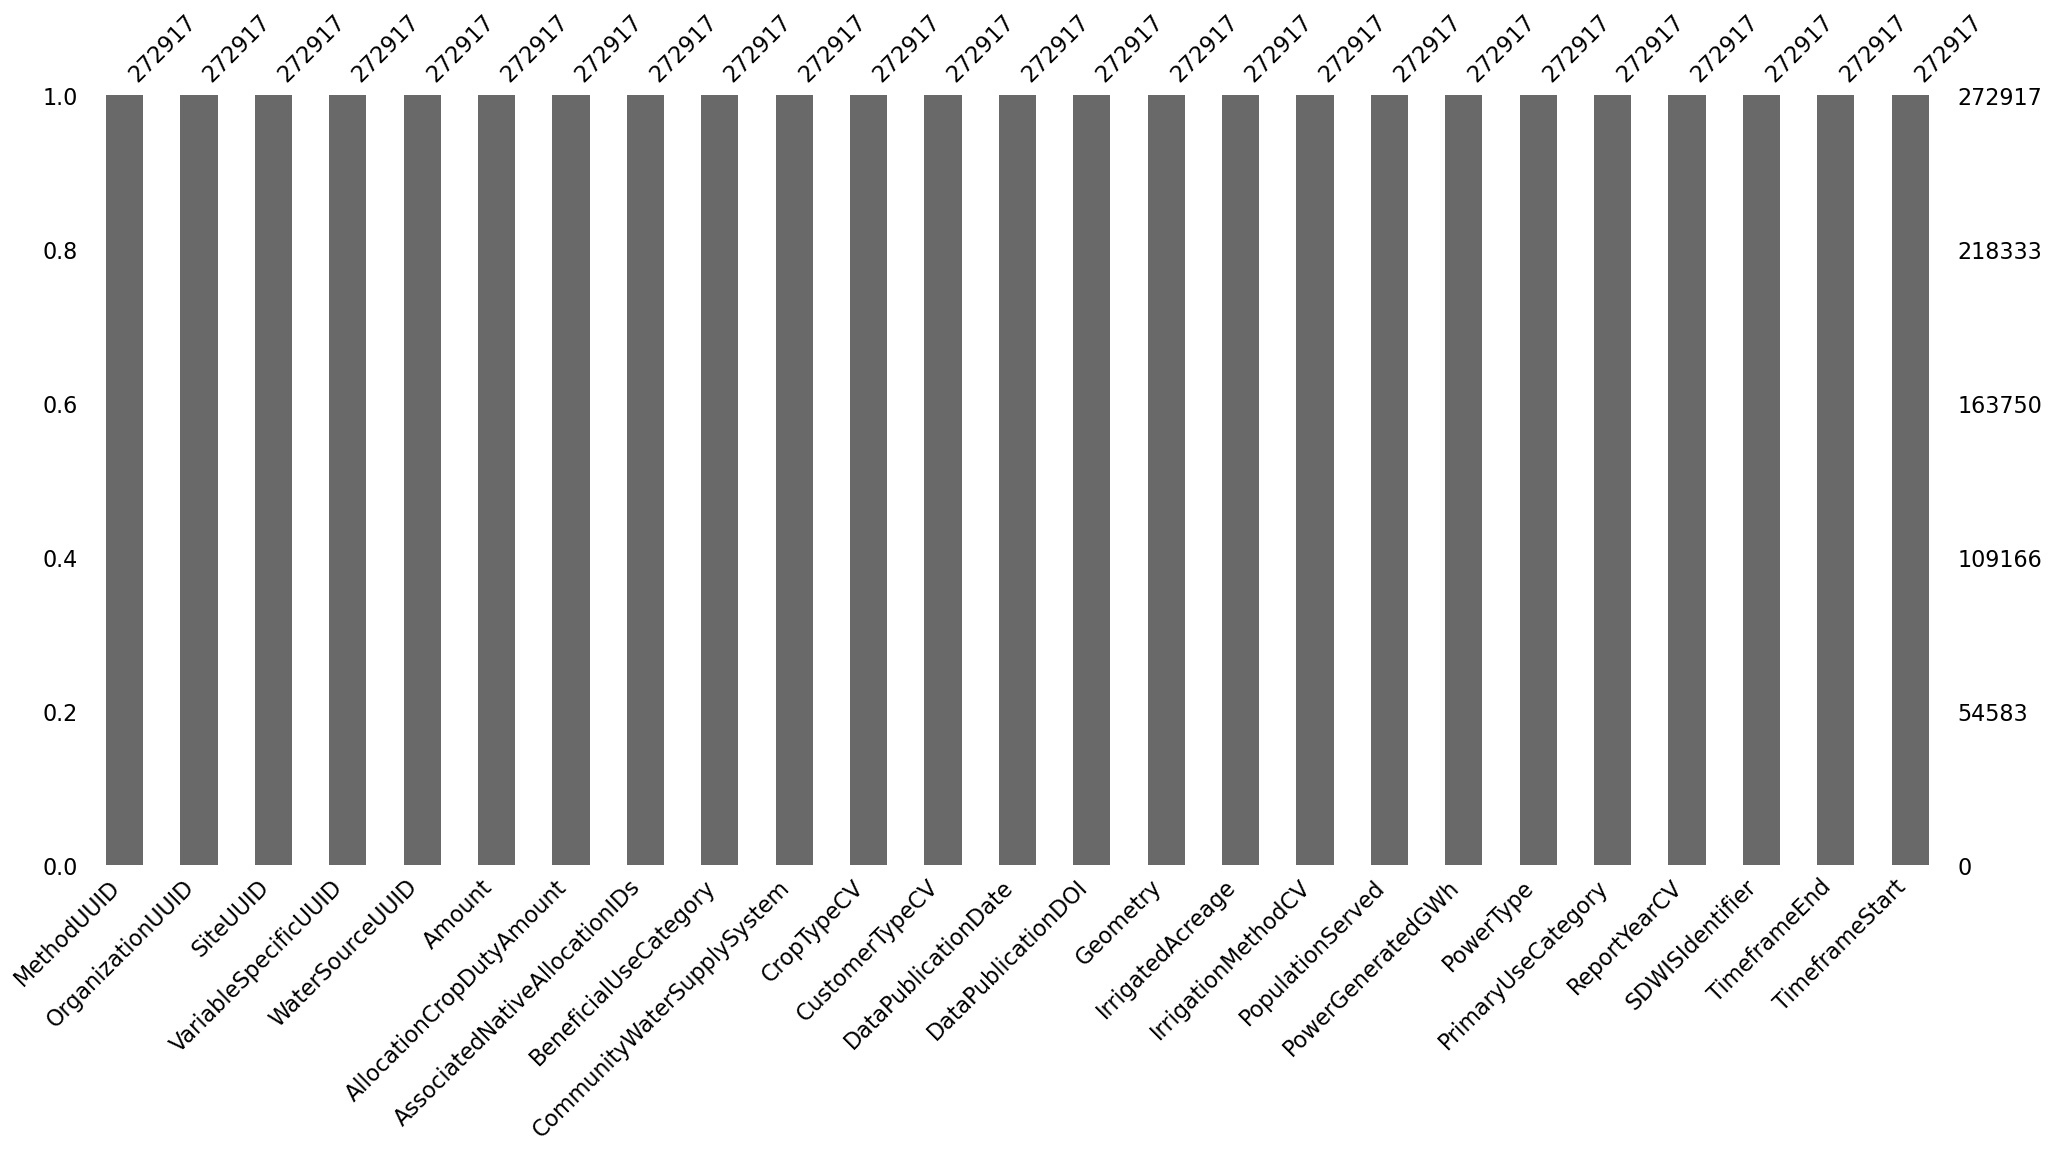

In [21]:
# Check what columns contain missing information.
msno.bar(dfsa)

In [22]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfsa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Agricultural Irrigation',
 'Heating/Cooling',
 'Industrial Processing',
 'Non-Crop Irrigation',
 'Power Generation',
 'Special Categories',
 'Water Level Maintenance',
 'Water Supply']

In [23]:
# Unique values for 'in_CropTypeCV'
for x in dfsa['CropTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [24]:
# Unique values for 'in_CustomerTypeCV'
for x in dfsa['CustomerTypeCV'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"",


In [25]:
# Unique values for 'in_PopulationServed'
for x in dfsa['PopulationServed'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"",


In [26]:
# Unique values for 'in_ReportYearCV'
for x in dfsa['ReportYearCV'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"1988",
"1989",
"1990",
"1991",
"1992",
"1993",
"1994",
"1995",
"1996",
"1997",
"1998",
"1999",
"2000",
"2001",
"2002",
"2003",
"2004",
"2005",
"2006",
"2007",
"2008",
"2009",
"2010",
"2011",
"2012",
"2013",
"2014",
"2015",
"2016",
"2017",
"2018",
"2019",
"2020",
"2021",
"2022",


## Markdown Table Creation

In [27]:
# method.csv
try:
  dftmp = dfm.loc[[0]].drop(['MethodDescription'], axis=1).copy().to_markdown()
except:
  dftmp = dfm.drop(['MethodDescription'], axis=1).copy().to_markdown()
print(dftmp)

|    | MethodUUID   | ApplicableResourceTypeCV   | DataConfidenceValue   | DataCoverageValue   | DataQualityValueCV   | MethodName                    | MethodNEMILink                                                                    | MethodTypeCV    | WaDEDataMappingUrl                                                                                                 |
|---:|:-------------|:---------------------------|:----------------------|:--------------------|:---------------------|:------------------------------|:----------------------------------------------------------------------------------|:----------------|:-------------------------------------------------------------------------------------------------------------------|
|  0 | MNwr_M1      | Surface Ground Water       |                       |                     |                      | Minnesota Water Rights Method | https://www.dnr.state.mn.us/waters/watermgmt_section/appropriations/wateruse.html | Legal Processes | http

In [28]:
# variable.csv
try:
  dftmp = dfv.loc[[0]].copy().to_markdown()
except:
  dftmp = dfv.copy().to_markdown()
print(dftmp)

|    | VariableSpecificUUID   |   AggregationInterval | AggregationIntervalUnitCV   | AggregationStatisticCV   | AmountUnitCV   | MaximumAmountUnitCV   |   ReportYearStartMonth | ReportYearTypeCV   | VariableCV   | VariableSpecificCV   |
|---:|:-----------------------|----------------------:|:----------------------------|:-------------------------|:---------------|:----------------------|-----------------------:|:-------------------|:-------------|:---------------------|
|  0 | MNwr_V1                |                     1 | Annual                      | Average                  | AF             | AF                    |                      1 | CalendarYear       | Allocation   | Allocation           |


In [29]:
# organizations.csv
try:
  dftmp = dfo.loc[[0]].copy().to_markdown()
except:
  dftmp = dfo.copy().to_markdown()
print(dftmp)

|    | OrganizationUUID   | OrganizationContactEmail     | OrganizationContactName   | OrganizationName                          | OrganizationPhoneNumber   | OrganizationPurview                                                             | OrganizationWebsite          | State   |
|---:|:-------------------|:-----------------------------|:--------------------------|:------------------------------------------|:--------------------------|:--------------------------------------------------------------------------------|:-----------------------------|:--------|
|  0 | MNwr_O1            | Carmelita.Nelson@state.mn.us | Carmelita Nelson          | Minnesota Department of Natural Resources | 651-296-6157              | The DNR is committed to creating a healthy, sustainable, and livable Minnesota. | https://www.dnr.state.mn.us/ | MN      |


In [30]:
# watersources.csv
try:
  dftmp = dfws.loc[[0]].copy().to_markdown()
except:
  dftmp = dfws.copy().to_markdown()
print(dftmp)

|    | WaterSourceUUID   | Geometry   | GNISFeatureNameCV   | WaterQualityIndicatorCV   | WaterSourceName   |   WaterSourceNativeID | WaterSourceTypeCV   |
|---:|:------------------|:-----------|:--------------------|:--------------------------|:------------------|----------------------:|:--------------------|
|  0 | MNwr_WS1000001289 |            |                     | Fresh                     | WaDE Blank        |            1000001289 | Groundwater         |


In [31]:
# sites.csv
try:
  dftmp = dfs.loc[[0]].drop(['Geometry'], axis=1).copy().to_markdown()
except:
  dftmp = dfs.drop(['Geometry'], axis=1).copy().to_markdown()
print(dftmp)

|    | SiteUUID         | RegulatoryOverlayUUIDs   | WaterSourceUUIDs   | CoordinateAccuracy   | CoordinateMethodCV   | County   |   EPSGCodeCV | GNISCodeCV   | HUC12   | HUC8   |   Latitude |   Longitude | NHDNetworkStatusCV   | NHDProductCV   | PODorPOUSite   |   SiteName | SiteNativeID   | SitePoint   | SiteTypeCV   | StateCV   | USGSSiteID   |
|---:|:-----------------|:-------------------------|:-------------------|:---------------------|:---------------------|:---------|-------------:|:-------------|:--------|:-------|-----------:|------------:|:---------------------|:---------------|:---------------|-----------:|:---------------|:------------|:-------------|:----------|:-------------|
|  0 | MNwr_SwadeId1000 |                          | MNwr_WS686289      | WaDE Blank           | WaDE Blank           | Isanti   |         4326 |              |         |        |    45.5944 |    -93.1795 |                      |                | POD            |         10 | wadeId1000     |       

In [32]:
# waterallocations.csv
try:
  dftmp = dfaa.loc[[0]].copy().to_markdown()
except:
  dftmp = dfaa.copy().to_markdown()
print(dftmp)

|    | AllocationUUID   | MethodUUID   | OrganizationUUID   | SiteUUID      | VariableSpecificUUID   | AllocationApplicationDate   | AllocationAssociatedConsumptiveUseSiteIDs   | AllocationAssociatedWithdrawalSiteIDs   | AllocationBasisCV   | AllocationChangeApplicationIndicator   | AllocationCommunityWaterSupplySystem   | AllocationCropDutyAmount   | AllocationExpirationDate   |   AllocationFlow_CFS | AllocationLegalStatusCV   | AllocationNativeID   | AllocationOwner                       | AllocationPriorityDate   | AllocationSDWISIdentifierCV   | AllocationTimeframeEnd   | AllocationTimeframeStart   | AllocationTypeCV   |   AllocationVolume_AF | BeneficialUseCategory   | CommunityWaterSupplySystem   | CropTypeCV   | CustomerTypeCV   | DataPublicationDate   | DataPublicationDOI   |   ExemptOfVolumeFlowPriority | GeneratedPowerCapacityMW   |   IrrigatedAcreage | IrrigationMethodCV   | LegacyAllocationIDs   | OwnerClassificationCV   | PopulationServed   | PowerType   | PrimaryBeneficia

In [33]:
# sitespecificamounts.csv
try:
  dftmp = dfsa.loc[[0]].copy().to_markdown()
except:
  dftmp = dfsa.copy().to_markdown()
print(dftmp)

|    | MethodUUID   | OrganizationUUID   | SiteUUID      | VariableSpecificUUID   | WaterSourceUUID   |   Amount | AllocationCropDutyAmount   | AssociatedNativeAllocationIDs   | BeneficialUseCategory   | CommunityWaterSupplySystem   | CropTypeCV   | CustomerTypeCV   | DataPublicationDate   | DataPublicationDOI   | Geometry   | IrrigatedAcreage   | IrrigationMethodCV   | PopulationServed   | PowerGeneratedGWh   | PowerType   | PrimaryUseCategory   |   ReportYearCV | SDWISIdentifier   | TimeframeEnd   | TimeframeStart   |
|---:|:-------------|:-------------------|:--------------|:-----------------------|:------------------|---------:|:---------------------------|:--------------------------------|:------------------------|:-----------------------------|:-------------|:-----------------|:----------------------|:---------------------|:-----------|:-------------------|:---------------------|:-------------------|:--------------------|:------------|:---------------------|---------------:|:----

## Num of Record Summary

In [34]:
# Num of entries of source data
print(f"Num of Source #1 Entries (rows): ", "|", len(dfin1))
# print(f"Num of Source #2 Entries (rows): ", "|", len(dfin2))

Num of Source #1 Entries (rows):  | 30818


In [35]:
# Num of entries compiled into WaDE
podString =  len(dfs[dfs['PODorPOUSite'] == 'POD'])
pouString=  len(dfs[dfs['PODorPOUSite'] == 'POU'])
aaString = len(dfaa)
saString = len(dfsa)
print("Dataset  | Num of Identified PODs | Num of Identified POUs | Num of Identified Water Right Records | Num of Identified Water Use Records")
print("**Compiled WaDE Data** |", podString, "|", pouString, "|", aaString, "|", saString)

Dataset  | Num of Identified PODs | Num of Identified POUs | Num of Identified Water Right Records | Num of Identified Water Use Records
**Compiled WaDE Data** | 16741 | 0 | 10335 | 272917


## Why Removed Records Summary

In [36]:
print("---- Reasons why records were removed from water source info ----")
if len(dfwspurge) != 0:
    print(dfwspurge['ReasonRemoved'].value_counts().astype(str) + " | removed from watersources.csv input")
else:
    print("...nothing removed.")

---- Reasons why records were removed from water source info ----
ReasonRemoved
Unused WaterSource Record    9 | removed from watersources.csv input
Name: count, dtype: object


In [37]:
print(" ---- Reasons why records were removed from site info ---- ")
if len(dfspurge) != 0:
    print(dfspurge['ReasonRemoved'].value_counts().astype(str) + " | removed from sites.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from site info ---- 
ReasonRemoved
Incomplete or bad entry for SiteName    19 | removed from sites.csv input
Incomplete or bad entry for County       1 | removed from sites.csv input
Name: count, dtype: object


In [38]:
print(" ---- Reasons why records were removed from allocation amount info ---- ")
if len(dfaapurge) != 0:
    print(dfaapurge['ReasonRemoved'].value_counts().astype(str) + " | removed from waterallocations.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from allocation amount info ---- 
ReasonRemoved
Incomplete or bad entry for SiteUUID    5 | removed from waterallocations.csv input
Name: count, dtype: object


In [39]:
print(" ---- Reasons why records were removed from site specific amounts  info ---- ")
if len(dfsapurge) != 0:
    print(dfsapurge['ReasonRemoved'].value_counts().astype(str) + " | removed from sitespecificamounts.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from site specific amounts  info ---- 
ReasonRemoved
Negative, blank, or 0 Amount values                     338866 | removed from sitespecificamounts.csv ...
Not Unique combination of SiteSpecificAmounts record    1088 | removed from sitespecificamounts.csv input
Incomplete or bad entry for SiteUUID                     635 | removed from sitespecificamounts.csv input
Name: count, dtype: object


## Figures

In [40]:
# ---- merge watersource.csv to sites.csv ----

# explode site.csv on WaterSourceUUIDs
dfstemp = dfs.copy()
dfstemp = dfstemp.assign(WaterSourceUUIDs=dfstemp['WaterSourceUUIDs'].str.split(',')).explode('WaterSourceUUIDs').reset_index(drop=True)

# merge
dfstemp_ws = pd.merge(dfstemp, dfws[['WaterSourceUUID', 'WaterSourceTypeCV']], left_on='WaterSourceUUIDs', right_on='WaterSourceUUID', how='left')

# groupby site-watersource.csv via SiteUUID
dfstemp_ws = dfstemp_ws.groupby('SiteUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem != ""])).replace(np.nan, "").reset_index()

print(len(dfstemp_ws))
dfstemp_ws.head(1)

16741


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  MNwr_SwadeId1000                           MNwr_WS686289   

  CoordinateAccuracy CoordinateMethodCV  County EPSGCodeCV Geometry  \
0         WaDE Blank         WaDE Blank  Isanti       4326            

  GNISCodeCV HUC12 HUC8           Latitude           Longitude  \
0                        45.59440158800004  -93.17949607599996   

  NHDNetworkStatusCV NHDProductCV PODorPOUSite SiteName SiteNativeID  \
0                                          POD       10   wadeId1000   

  SitePoint  SiteTypeCV StateCV USGSSiteID WaterSourceUUID WaterSourceTypeCV  
0            WaDE Blank      MN              MNwr_WS686289       Groundwater

PODorPOUSite
POD    16741
Name: count, dtype: int64


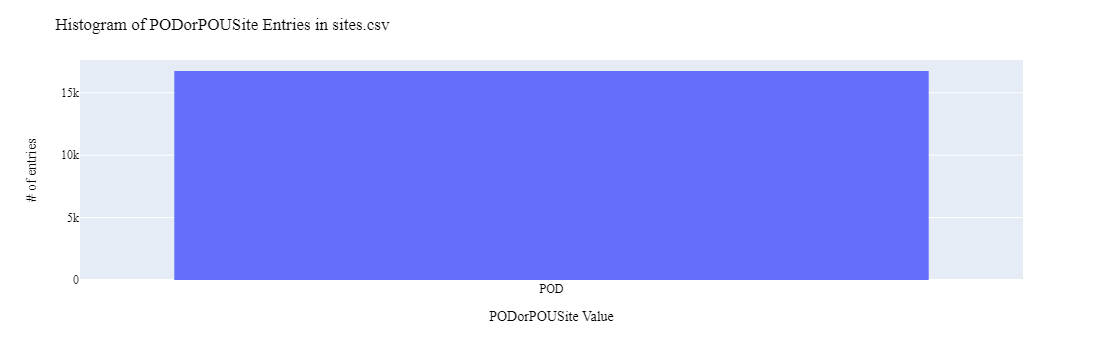

In [41]:
# ---- Histogram: Num of POD sites vs POU sites ----
print(dfstemp_ws.PODorPOUSite.value_counts())

fig = px.histogram(dfstemp_ws, x="PODorPOUSite")
fig.update_layout(bargap=0.2,
                  title="Histogram of PODorPOUSite Entries in sites.csv",
                  xaxis_title="PODorPOUSite Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PODorPOUSite.png', engine="kaleido")

WaterSourceTypeCV
Groundwater                  14711
Surface Water                 2026
Groundwater,Surface Water        3
WaDE Blank                       1
Name: count, dtype: int64


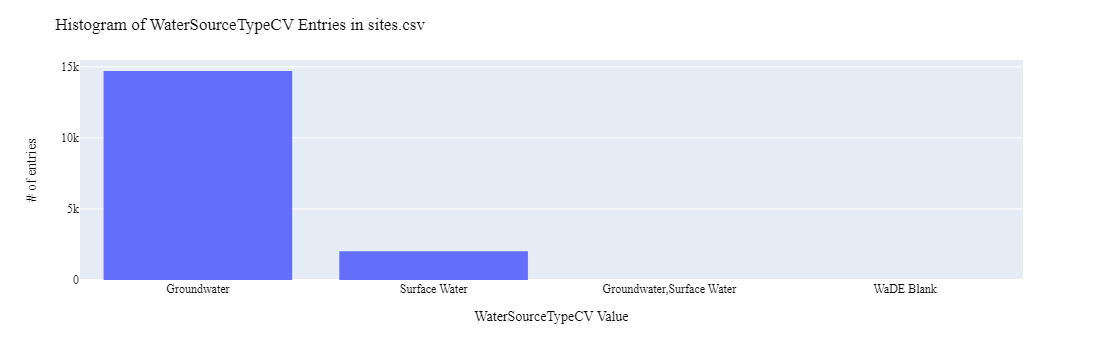

In [42]:
# ---- Histogram: Num of sites via WatersourceTypeCV ----
print(dfstemp_ws.WaterSourceTypeCV.value_counts())

fig = px.histogram(dfstemp_ws, x="WaterSourceTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaterSourceTypeCV Entries in sites.csv",
                  xaxis_title="WaterSourceTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/WaterSourceTypeCV.png', engine="kaleido")

PrimaryBeneficialUseCategory
Agriculture Irrigation    6587
Other                     1135
Public Supply              873
Municipal Irrigation       685
Commercial/Industrial      499
In-stream Flow             487
Hydroelectric               44
Thermoelectric Cooling      25
Name: count, dtype: int64


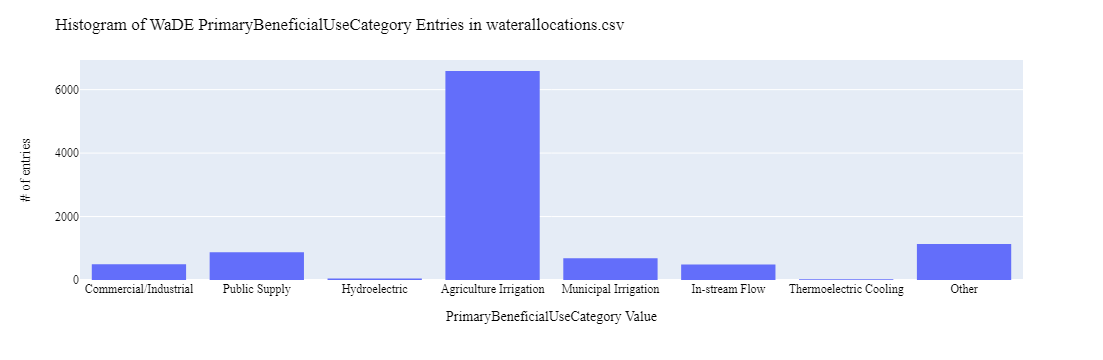

In [43]:
# ---- Histogram: Distribution of PrimaryBeneficialUseCategory WaDE Values ----
print(dfaa.PrimaryBeneficialUseCategory.value_counts())

fig = px.histogram(dfaa, x="PrimaryBeneficialUseCategory")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaDE PrimaryBeneficialUseCategory Entries in waterallocations.csv",
                  xaxis_title="PrimaryBeneficialUseCategory Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PrimaryBeneficialUseCategory.png', engine="kaleido")

AllocationPriorityDate
    10335
Name: count, dtype: int64


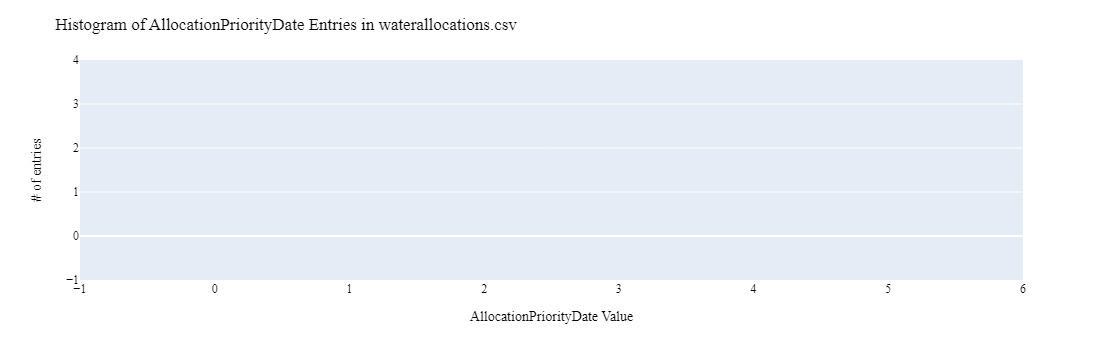

In [44]:
# ---- AllocationPriorityDate #1: histogram distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.histogram(dfaatemp, x="AllocationPriorityDate")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate1.png', engine="kaleido")

AllocationPriorityDate
    10335
Name: count, dtype: int64


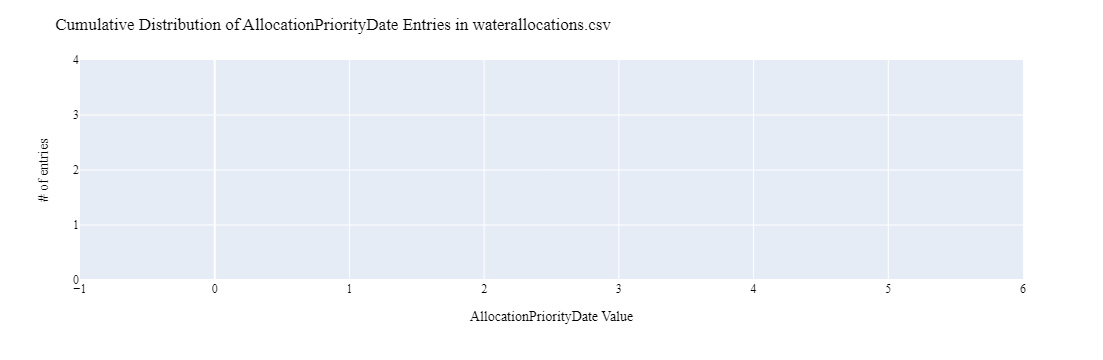

In [45]:
# ---- AllocationPriorityDate #2: cumulative distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.ecdf(dfaatemp, x="AllocationPriorityDate", ecdfnorm=None)
fig.update_layout(bargap=0.2,
                  title="Cumulative Distribution of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate2.png', engine="kaleido")

AllocationLegalStatusCV
Active    10335
Name: count, dtype: int64


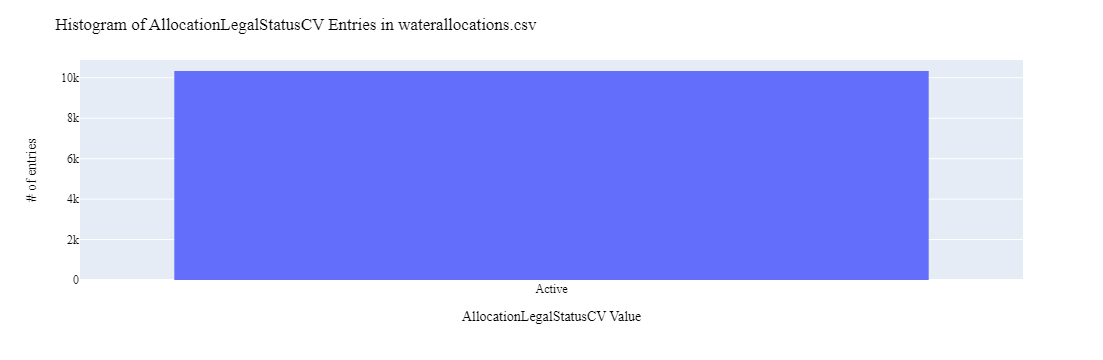

In [46]:
# ---- AllocationLegalStatusCV: histogram distribution of WaDE values ----
print(dfaa.AllocationLegalStatusCV.value_counts())

fig = px.histogram(dfaa, x="AllocationLegalStatusCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationLegalStatusCV Entries in waterallocations.csv",
                  xaxis_title="AllocationLegalStatusCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationLegalStatusCV.png', engine="kaleido")

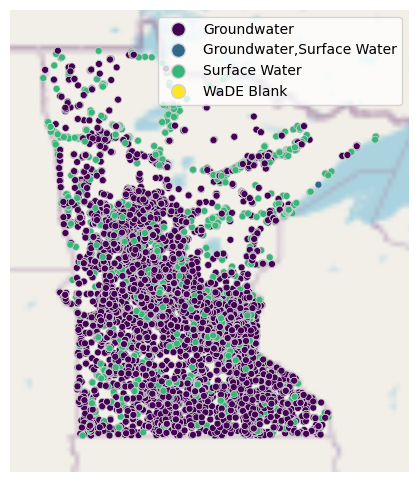

In [47]:
# ---- Map of Points sites ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] == ''].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=gpd.points_from_xy(dfstemp.Longitude.astype(float), dfstemp.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfstemp, hue='WaterSourceTypeCV', edgecolor='lightgray', linewidth=0.5, legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="png", fname='figures/PointMap.png') 
except:
    print('No point data to plot')

No geometry data to plot


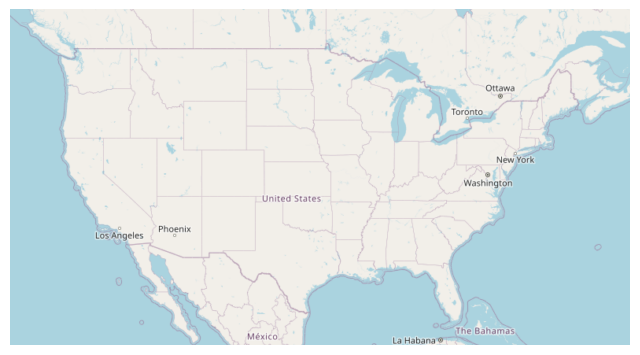

In [48]:
# ---- Map of Polygons ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfstemp['Geometry'] = gpd.GeoSeries.from_wkt(dfstemp['Geometry'], crs="EPSG:4326")
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=dfstemp['Geometry'], crs="EPSG:4326") # covert to geodataframe
    gplt.choropleth(gdfstemp, edgecolor='lightgray', linewidth=0.5, hue='WaterSourceTypeCV', legend=True, ax=ax)
    mplt.savefig(format="png", fname='figures/PolyMap.png')
except:
    print('No geometry data to plot')

### Allocation CFS, allocation AF, & Water Use Amount

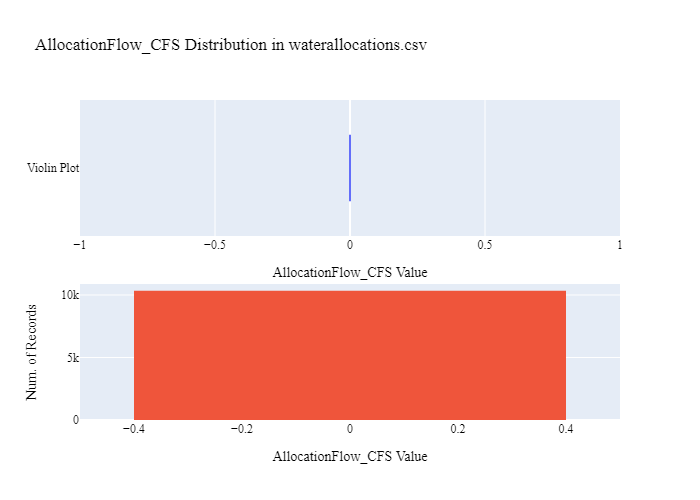

In [49]:
# ---- AllocationFlow_CFS: Boxplot distribution of WaDE values ----

try: 
    trace1 = go.Violin(x=dfaa['AllocationFlow_CFS'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationFlow_CFS'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationFlow_CFS Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show(renderer="png")
    fig.write_image('figures/AllocationFlow_CFS.png', engine="kaleido")

except: print('Could not plot AllocationFlow_CFS value.')

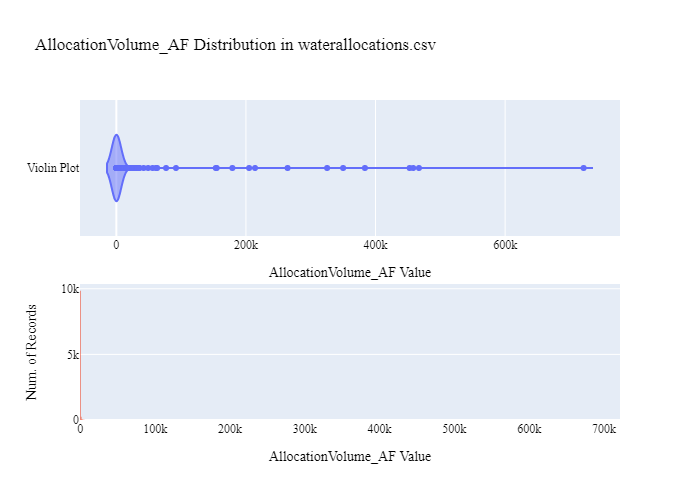

In [50]:
# ---- AllocationVolume_AF: Boxplot distribution of WaDE values ----

try:
    trace1 = go.Violin(x=dfaa['AllocationVolume_AF'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationVolume_AF'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationVolume_AF Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show(renderer="png")
    fig.write_image('figures/AllocationVolume_AF.png', engine="kaleido")

except: print('Could not plot AllocationVolume_AF value.')

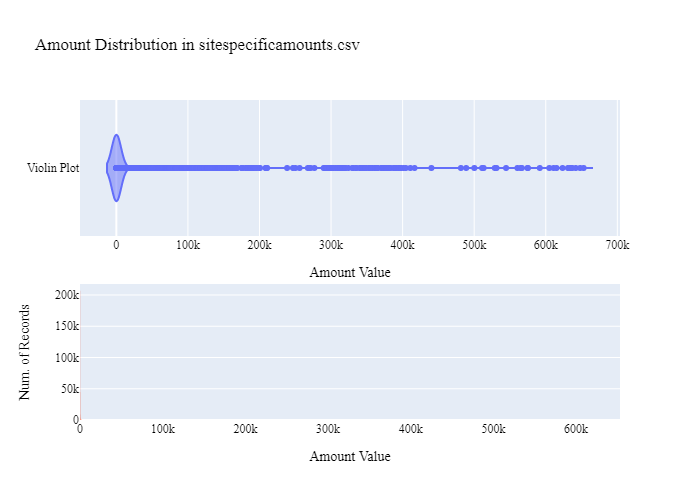

In [51]:
# ---- Amount: Boxplot distribution of WaDE values ----

try: 
    trace1 = go.Violin(x=dfsa['Amount'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfsa['Amount'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="Amount Distribution in sitespecificamounts.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="Amount Value", row=1, col=1)
    fig.update_xaxes(title_text="Amount Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show(renderer="png")
    fig.write_image('figures/Amount.png', engine="kaleido")

except: print('Could not plot Amount value.')

# Removed Records compared to Source Data
- this is working just fine, just want to comment out temporarily for future use

In [52]:
# # Explode purge.xlsx files by WaDEUUID, concat together
# #################################################################

# # Explode watersources_missing.xlsx records by WaDEUUID
# dfwspurgeCopy = dfwspurge.assign(WaDEUUID=dfwspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfwspurgeCopy = dfwspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode sites_missing.xlsx records by WaDEUUID
# dfspurgeCopy = dfspurge.assign(WaDEUUID=dfspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfspurgeCopy = dfspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode waterallocations_missing.xlsx records by WaDEUUID
# dfaapurgeCopy = dfaapurge.assign(WaDEUUID=dfaapurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfaapurgeCopy = dfaapurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # concat purge dataframes togehter
# frames = [dfwspurgeCopy, dfspurgeCopy, dfaapurgeCopy] 
# dfWaDEUUID = pd.concat(frames)
# dfWaDEUUID = dfWaDEUUID.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
# print(len(dfWaDEUUID))
# dfWaDEUUID.head(1)

# Custom Queries and Analysis for this Dataset

In [53]:
# N/A